In [2]:
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Linear Regression

# $Y = a + b * X + e$


In [3]:
data = pd.read_csv("C:\\Users\\Farzana Saif\\Downloads\\diamond.csv")
data

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641
...,...,...,...,...,...,...
303,304,1.01,I,VS1,HRD,8175
304,305,1.02,F,VVS2,HRD,10796
305,306,1.06,H,VVS2,HRD,9890
306,307,1.02,H,VS2,HRD,8959


In [4]:
data.shape

(308, 6)

In [5]:
data.columns

Index(['Unnamed: 0', 'carat', 'colour', 'clarity', 'certification', 'price'], dtype='object')

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,308.0,154.500000,89.056162,1.00,77.75,154.50,231.25,308.0
carat,308.0,0.630909,0.277183,0.18,0.35,0.62,0.85,1.1
price,308.0,5019.483766,3403.115715,638.00,1625.00,4215.00,7446.00,16008.0


In [7]:
data.dtypes

Unnamed: 0         int64
carat            float64
colour            object
clarity           object
certification     object
price              int64
dtype: object

In [8]:
#isolate X and Y
y = data.price
X = data.carat


In [9]:
X = sm.add_constant(X)
X.head(2)

,const,carat
0,1.0,0.3
1,1.0,0.3


In [10]:
#Regression Model
model1 = sm.OLS(endog = y, exog =X). fit() 
print ( model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2541.
Date:                Tue, 09 Sep 2025   Prob (F-statistic):          3.04e-150
Time:                        22:58:19   Log-Likelihood:                -2597.9
No. Observations:                 308   AIC:                             5200.
Df Residuals:                     306   BIC:                             5207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2298.3576    158.531    -14.498      0.0

Text(0, 0.5, 'Price')

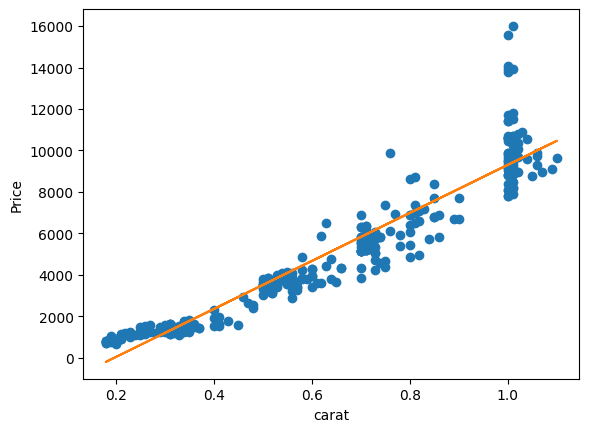

In [11]:
X = data.carat
plt.plot(X,y, 'o')
b,a = np.polyfit( X, y, 1 )
plt.plot(X, b* X + a)
plt.xlabel("carat")
plt.ylabel("Price")

# Linear Regression with Dummy varriable

In [12]:
data.carat.describe()



count    308.000000
mean       0.630909
std        0.277183
min        0.180000
25%        0.350000
50%        0.620000
75%        0.850000
max        1.100000
Name: carat, dtype: float64

In [13]:
#Create binary variable

data["carat_binary"] = np.where(data.carat > 0.6,1,0)
data.head()

,Unnamed: 0,carat,colour,clarity,certification,price,carat_binary
0,1,0.30,D,VS2,GIA,1302,0
1,2,0.30,E,VS1,GIA,1510,0
2,3,0.30,G,VVS1,GIA,1510,0
3,4,0.30,G,VS1,GIA,1260,0
4,5,0.31,D,VS1,GIA,1641,0


In [14]:
#isolate X and Y
y = data.carat_binary
X = data.price

In [15]:
X = sm.add_constant(X)


In [16]:
model2 = sm.OLS(endog = y , exog = X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:           carat_binary   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     591.5
Date:                Tue, 09 Sep 2025   Prob (F-statistic):           1.79e-73
Time:                        22:58:20   Log-Likelihood:                -57.817
No. Observations:                 308   AIC:                             119.6
Df Residuals:                     306   BIC:                             127.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0931      0.030     -3.128      0.0

Text(0, 0.5, 'Price')

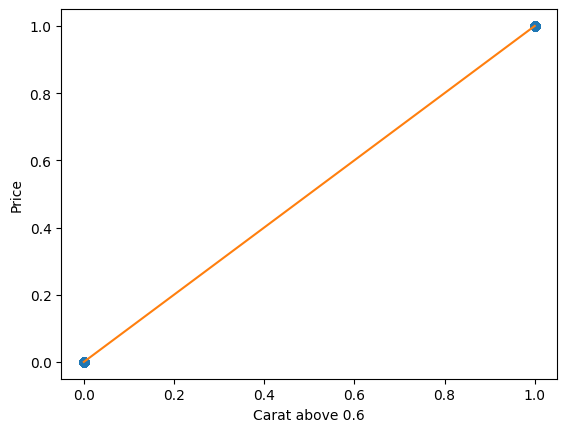

In [21]:
X = data.carat_binary
plt.plot(X, y, 'o')
b,a = np.polyfit(X, y, 1)
plt.plot(X, b * X + a)
plt.xlabel("Carat above 0.6")
plt.ylabel("Price")
